In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install pillow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

1. Взять любую ч/б картинку и применить сжатие через SVD с разными уровнями погрешности eps
Изобразить результаты

In [3]:
def SVD(img, R):
    U, S, V = np.linalg.svd(img, full_matrices=False)
    return U[:, :R], np.diag(S[:R]), V[:R, :]

def compress(img, R):
    U, S, V = SVD(img, R)
    return U@S@V

def plot_img(original, compressed, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Before')
    axes[0].axis('off')
    axes[1].imshow(compressed, cmap='gray')
    axes[1].set_title('After')
    axes[1].axis('off')
    plt.suptitle(title)
    plt.show()

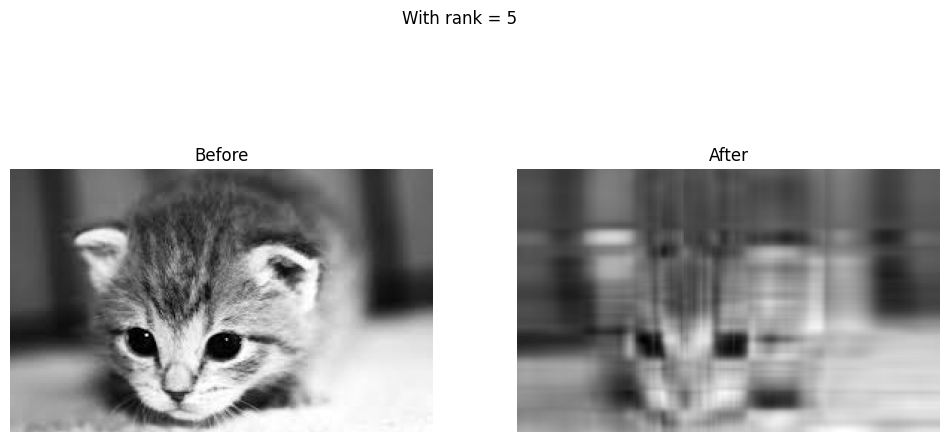

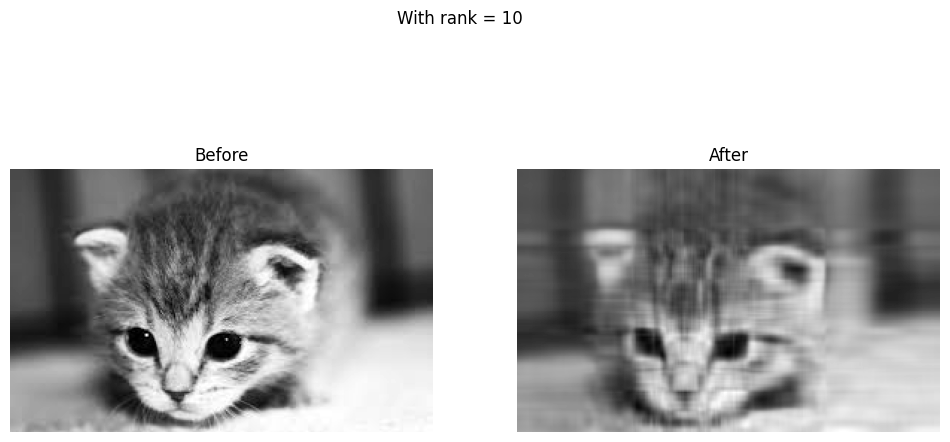

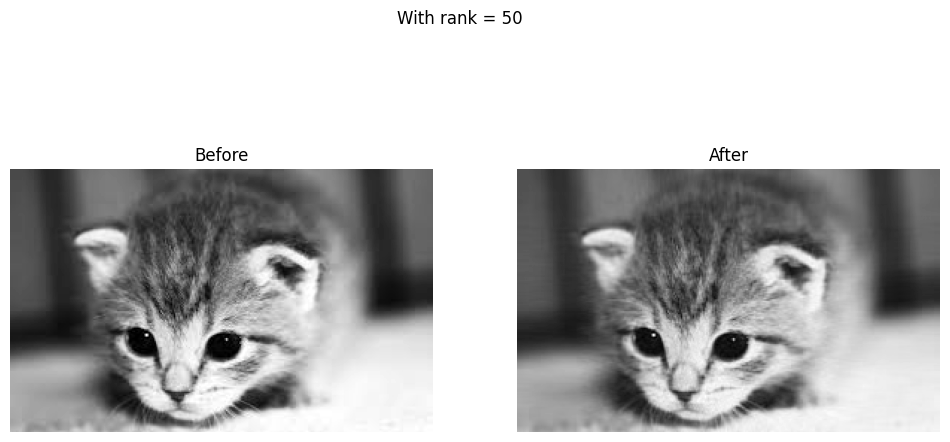

In [4]:
 img = np.array(Image.open('citty.jpg').convert('L'))

ranks = [5, 10, 50]

for r in ranks:
    compressed_img = compress(img, r)
    plot_img(img, compressed_img, f'With rank = {r}')

2. Сопоставить время matvec для A(i, j) = sin(i+j) + 2, 2048х2048 с использованием сжатия и без сжатия

In [8]:
import time

N = 2048
A = np.zeros([N, N])
for i in range(N):
    for j in range(N):
        A[i][j] = np.sin(i+j) + 2

x = np.random.rand(N)

# без сжатия
start1 = time.time()
# matvec1 = A@x
matvec1 = np.dot(A, x)
end1 = time.time()

dt1 = end1 - start1
print("без сжатия:", dt1, "секунд")

# с использованием сжатия
U, S, V = SVD(A, 3)

start2 = time.time()
# matvecSVD = U@(S@(V@x))
matvecSVD = np.dot(U, np.dot(S, np.dot(V, x)))
end2 = time.time()

dt2 = end2 - start2
print("с использованием сжатия:", dt2, "секунд")

без сжатия: 0.002999544143676758 секунд
с использованием сжатия: 0.0010058879852294922 секунд


3. Реализовать eps-окружение для матриц через SVD

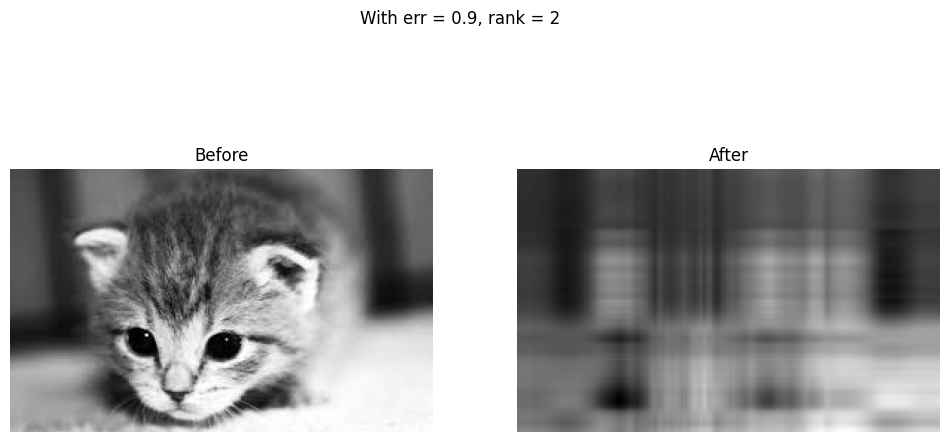

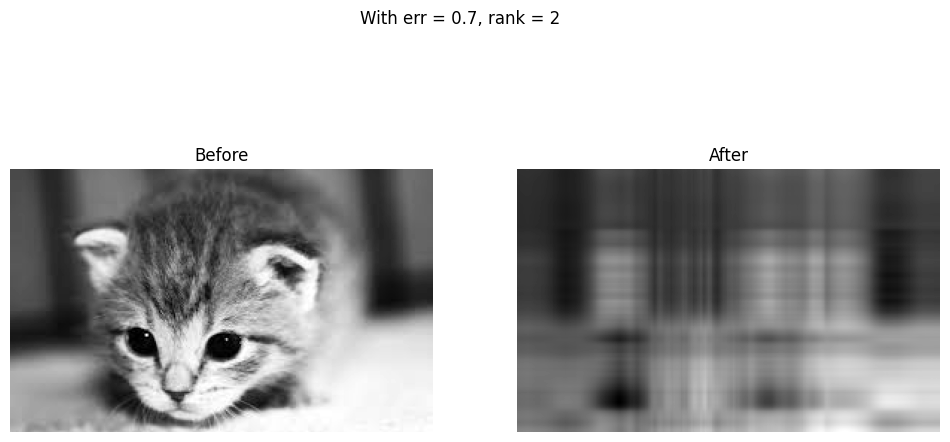

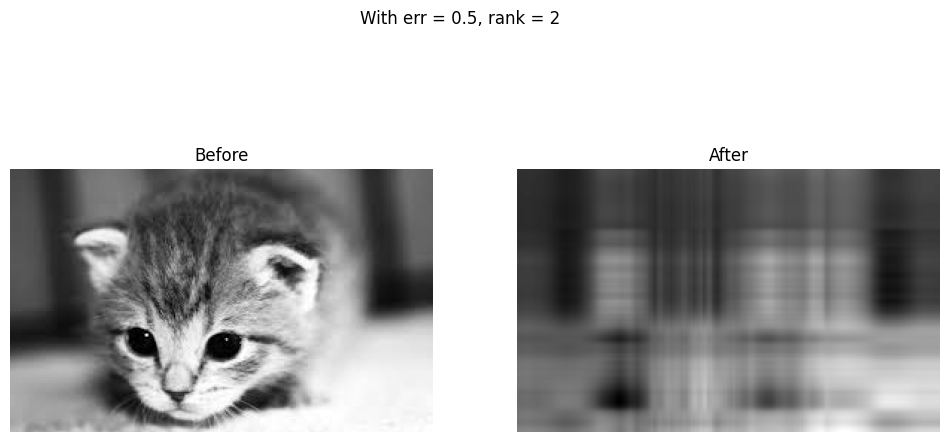

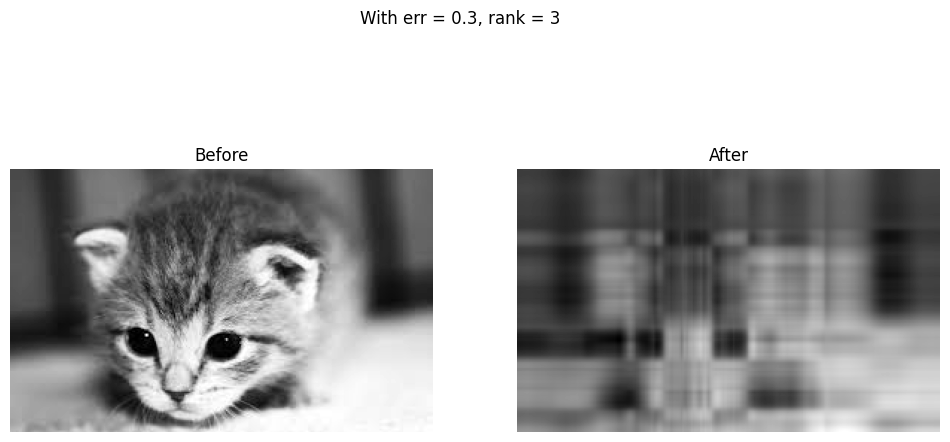

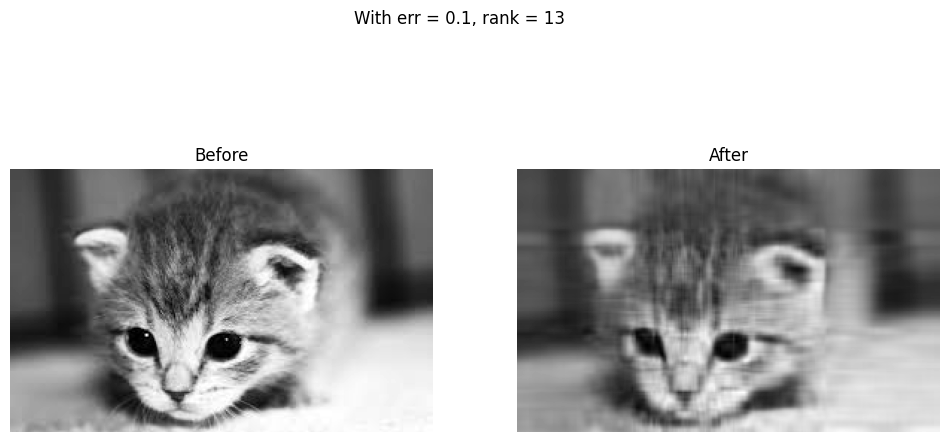

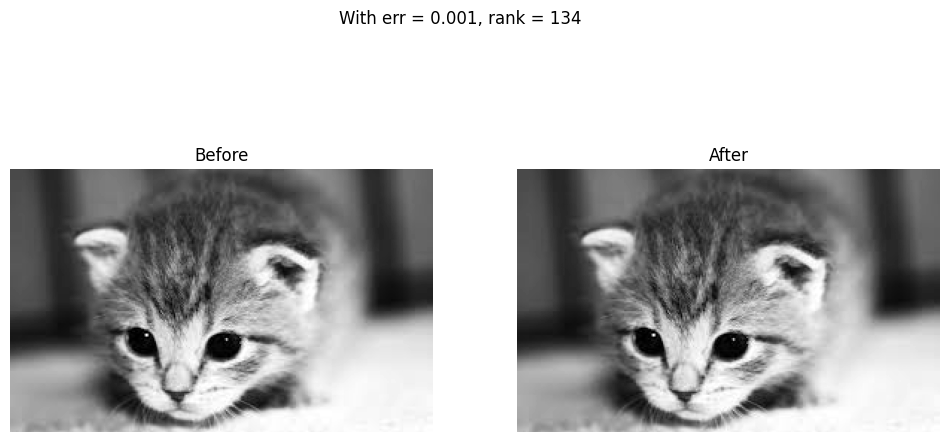

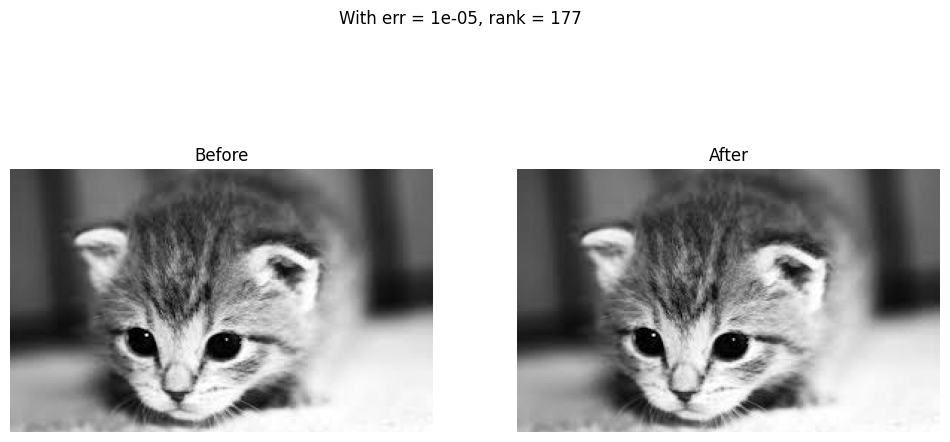

In [6]:
U, S, V = SVD(img, img.shape[0])

errs = [0.9, 0.7, 0.5, 0.3, 0.1, 0.001, 0.00001]

sigma = np.diag(S)
sigma = sigma/sigma[0]

for e in errs:
    delete = 0
    summ2 = 0
    i = -1
    while np.sqrt(summ2) <= e:
        delete += 1
        i -= 1
        summ2 += sigma[i]**2
    delete -= 1
    r = (S.shape[0] - delete)
    compressed_img = compress(img, r) 
    plot_img(img, compressed_img, f'With err = {e}, rank = {r}')